## Лабораторная работа №5. Модели Boosting
1. AdaBoost
2. GBM
3. XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Task4.csv')

In [3]:
rand_state = 1000

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Описание признаков:

1. __ID__ : ID of each client

2. __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit)


3. __SEX__: Gender (1=male, 2=female)

4. __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. __MARRIAGE__: Marital status (1=married, 2=single, 3=others)

6. __AGE__: Age in years

7. __PAY_1__: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

8. __PAY_2__: Repayment status in August, 2005 (scale same as above)

9. __PAY_3__: Repayment status in July, 2005 (scale same as above)

10. __PAY_4__: Repayment status in June, 2005 (scale same as above)

11. __PAY_5__: Repayment status in May, 2005 (scale same as above)

12. __PAY_6__: Repayment status in April, 2005 (scale same as above)

13. __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)

14. __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)

15. __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)

16. __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)

17. __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)

18. __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)

19. __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)

20. __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)

21. __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)

22. __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)

23. __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)

24. __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)

25. __default.payment.next.month__: Default payment (1=yes, 0=no)


*Note: NT is Taiwain Dollars*





In [5]:
df.isnull().sum()/len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [6]:
sum(df.duplicated())

0

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

---

In [9]:
ordinal_categoricals = ['SEX', 'EDUCATION', 'MARRIAGE']

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
enc = OrdinalEncoder()

In [12]:
df[ordinal_categoricals]= enc.fit_transform(df[ordinal_categoricals])

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0.0,3.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0.0,3.0,0.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1.0,3.0,0.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

In [15]:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


### Определение переменных и разделение данных

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [18]:
y = df['DEFAULT']
X = df.drop(['DEFAULT','ID'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Boosting classification с Sklearn

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#### installing XGBoost
XGBoost — это библиотека программного обеспечения, которую вы можете загрузить и установить на свой компьютер, а затем получить к ней доступ через различные интерфейсы. В частности, XGBoost поддерживает следующие основные интерфейсы:

1. Интерфейс командной строки (CLI).
2. C++ (язык, на котором написана библиотека).
3. Python.
4. R.
5. Julia.
6. Java и JVM языки, например, Scala и платформа Hadoop.

TЧтобы установить XGBoost в Python, просто используйте pip3 install xgboost в своем терминале. Более подробное руководство: https://xgboost.readthedocs.io/en/latest/build.html

In [21]:
from xgboost import XGBClassifier

#### Обучение моделей

In [22]:
%%time
# Fitting RF classifier to the Training set
RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

CPU times: user 9.06 s, sys: 2.75 ms, total: 9.07 s
Wall time: 11.7 s


RandomForestClassifier(random_state=1000)

In [23]:
%%time
# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=rand_state)
AdB_classifier.fit(X_train, y_train)

CPU times: user 2.06 s, sys: 332 µs, total: 2.06 s
Wall time: 2.05 s


AdaBoostClassifier(random_state=1000)

In [24]:
%%time
# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=rand_state, learning_rate=0.1, max_depth=6)
GBM_classifier.fit(X_train, y_train)

CPU times: user 20 s, sys: 0 ns, total: 20 s
Wall time: 22.1 s


GradientBoostingClassifier(max_depth=6, random_state=1000)

In [25]:
%%time
# Fitting XGBoost classifier to the Training set
XGB_classifier = XGBClassifier(random_state=rand_state, eta=0.1, max_depth=6)
XGB_classifier.fit(X_train, y_train)

CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 612 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
# Predicting the Test set probabilities and classes
y_hat_RF       = RF_classifier.predict(X_test)
y_hat_AdB      = AdB_classifier.predict(X_test)
y_hat_GBM      = GBM_classifier.predict(X_test)
y_hat_XGB      = XGB_classifier.predict(X_test)


---
## Оценка производительности модели на тестовых данных

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Сравнение точности и показателей f1

In [28]:
print('RF  Accuracy = {}'.format(accuracy_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(accuracy_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(accuracy_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.8203333333333334
AdB Accuracy = 0.8193333333333334
GBM Accuracy = 0.821
XGB Accuracy = 0.8233333333333334


In [29]:
print('RF  f1 = {}'.format(f1_score(y_test, y_hat_RF)))
print('AdB f1 = {}'.format(f1_score(y_test, y_hat_AdB)))
print('GBM f1 = {}'.format(f1_score(y_test, y_hat_GBM)))
print('XGB f1 = {}'.format(f1_score(y_test, y_hat_XGB)))

RF  f1 = 0.4795622787254586
AdB f1 = 0.4458077709611452
GBM f1 = 0.48448
XGB f1 = 0.4890745501285347


---------------

## Важность признаков

In [30]:
features = list(X_train.columns)

In [31]:
RF_importance  = RF_classifier.feature_importances_
AdB_importance = AdB_classifier.feature_importances_
GBM_importance = GBM_classifier.feature_importances_
XGB_importance = XGB_classifier.feature_importances_

In [32]:
FIM = pd.DataFrame({'Features': X_train.columns
                   , 'RF_Feature_importance':RF_importance
                   , 'AdB_Feature_importance':AdB_importance
                   , 'GBM_Feature_importance':GBM_importance
                   , 'XGB_Feature_importance':XGB_importance})
FIM = FIM.sort_values(by=['RF_Feature_importance'])
FIM

,Features,RF_Feature_importance,AdB_Feature_importance,GBM_Feature_importance,XGB_Feature_importance
3,MARRIAGE,0.012858,0.02,0.003858,0.015125
1,SEX,0.012911,0.02,0.005167,0.016647
2,EDUCATION,0.018517,0.02,0.008698,0.015896
9,PAY_5,0.019182,0.04,0.014323,0.040770
10,PAY_6,0.019509,0.02,0.017448,0.027742
8,PAY_4,0.021780,0.00,0.014560,0.058619
7,PAY_3,0.028568,0.04,0.015992,0.032939
6,PAY_2,0.043888,0.04,0.073678,0.095063
20,PAY_AMT4,0.044251,0.08,0.027422,0.017914
21,PAY_AMT5,0.044532,0.04,0.024518,0.014301


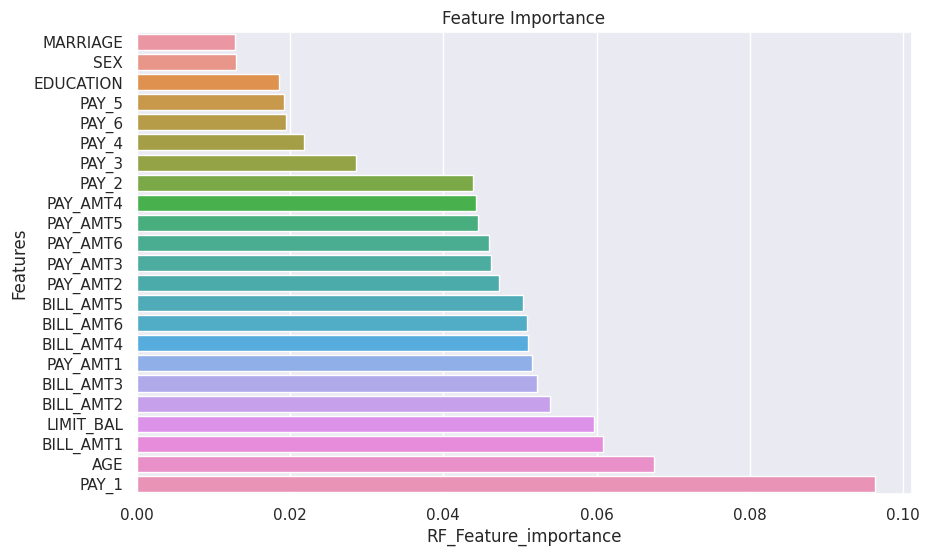

In [33]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='RF_Feature_importance', data=FIM)
plt.show()

#### Визуализация важности признаков с XGBoost

In [34]:
from xgboost import plot_importance

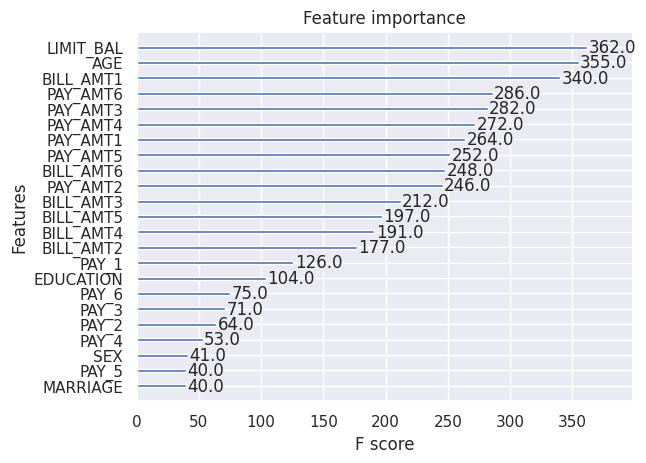

In [35]:
plot_importance(XGB_classifier, grid='gain')
plt.show()

---

###  Дополнительные ссылки:


1. Sklearn AdaBoost documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
2. Sklearn GBM documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html